# Funkce a metody

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter

In [22]:
# definice metody bisekce
def bisekce(funkce, zacatek, konec, odchylka):

    xka = []
    fxka = []
    while konec - zacatek > 2 * odchylka:
        x = (zacatek + konec)/2
        if funkce(zacatek)*funkce(x) < 0:
            konec = x
        else:
            zacatek = x
        xka.append(x)
        fxka.append(funkce(x))
    
    return (xka, fxka, x)

In [29]:
# definice newtonovy metody
def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

def newton(funkce, zacatek, konec, odchylka):

    xnew = (zacatek+konec)/2
    xold = zacatek
    xka = []
    fxka = []
    while abs(xnew - xold) > odchylka:
        xold = xnew
        xnew = xold - funkce(xold)/df(xold)
        xka.append(xnew)
        fxka.append(funkce(xnew))

    return(xka, fxka, xnew)

## Polynom

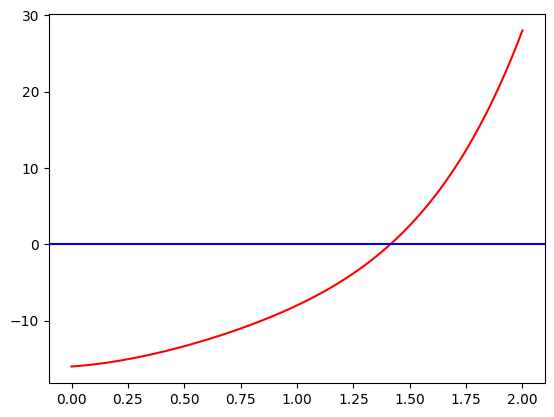

In [24]:
a = 0
b = 2 
x = np.linspace(a, b, 100)

def f(x):
    return x**5 -3*x**3 + 8*x**2 + 2*x -16

# vykreslení funkce pro odhadnutí počátečních bodů (dělal jsem vícekrát)
plt.plot(x, f(x), 'r')
plt.axhline(0, color = 'b')
plt.show()

### Metoda bisekce

1.416015625


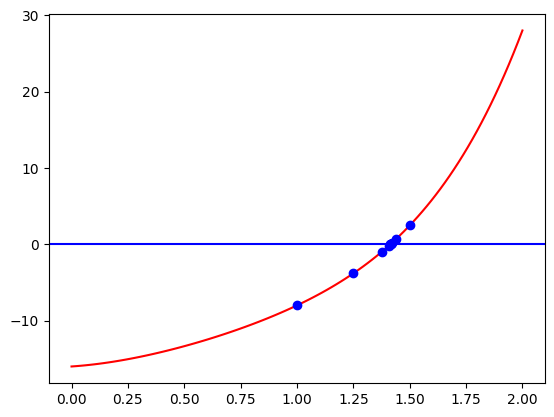

In [25]:
a = 0
b = 2 
odch = 0.001

# původní graf
z = np.linspace(a, b, 100)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

# metoda bisekce
(xka, fxka, x) = bisekce(f, a, b, odch)

# graf zobrazující "mezivýsledky"
print(x)
plt.plot(xka, fxka, 'bo')
plt.show()

### Newtonova metoda

1.4142136844299


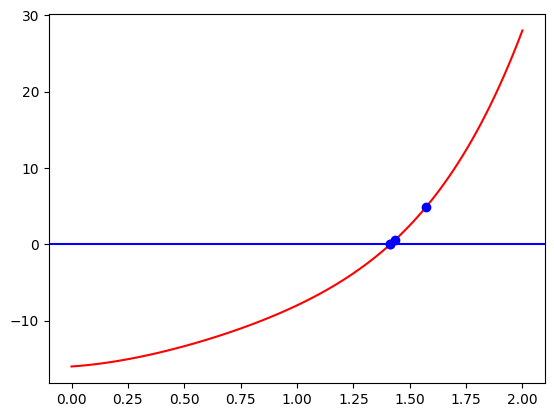

In [31]:
# definice derivace
def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

a = 0
b = 2
odch = 0.001

# původní graf
z = np.linspace(a, b, 100)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

# newtonova metoda
(xka, fxka, xnew) = newton(f, a , b, odch)

# graf zobrazující mezivýsldky
print(xnew)
plt.plot(xka, fxka, 'bo')
plt.show()

## Exponenciela

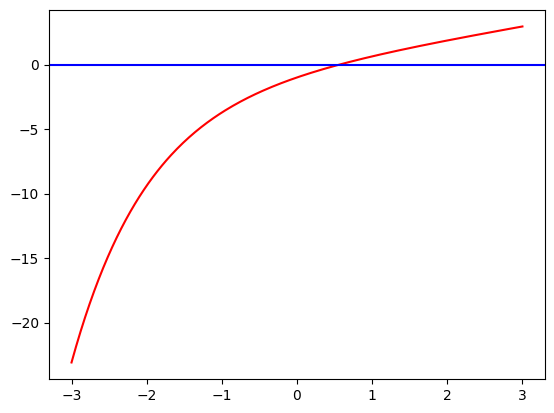

In [32]:
a = -3
b = 3
x = np.linspace(a, b, 300)

def f(x):
    return x - np.exp(-x)
 
plt.plot(x, f(x), 'r')
plt.axhline(0, color = 'b')
plt.show()

### Metoda bisekce

0.56689453125


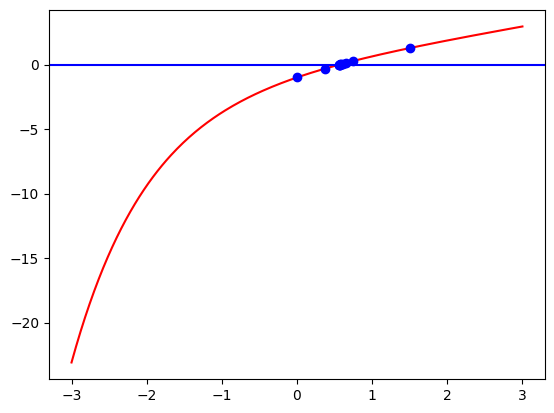

In [33]:
a = -3
b = 3
odch = 0.001

z = np.linspace(a, b, 300)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

(xka, fxka, x) = bisekce(f, a, b, odch)

print(x)
plt.plot(xka, fxka, 'bo')
plt.show()

### Newtonova metoda

0.5671431649830709


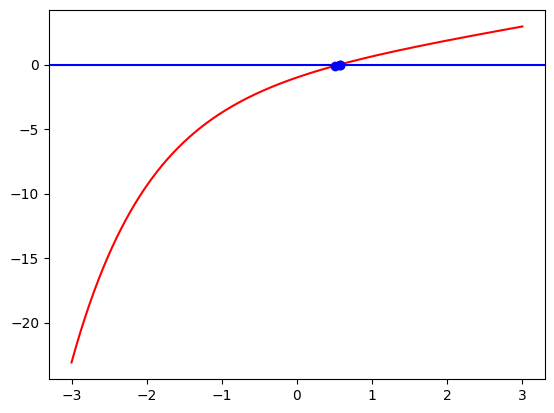

In [34]:
def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

a = -3
b = 3
odch = 0.001

z = np.linspace(a, b, 300)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

(xka, fxka, xnew) = newton(f, a, b, odch)

print(xnew)
plt.plot(xka, fxka, 'bo')
plt.show()

## Goniometrická funkce

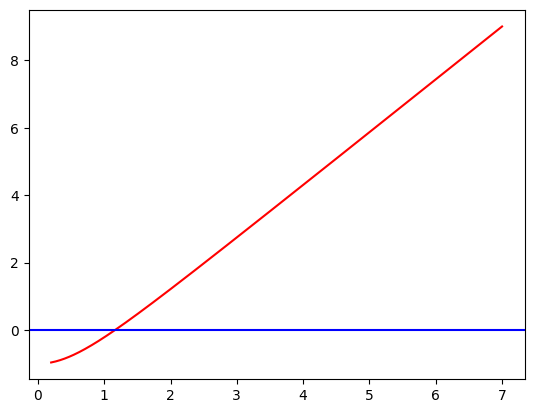

In [35]:
a = 0.2
b = 7
x = np.linspace(a, b, 400)

def f(x):
    return x * np.arctan(x) - 1
 
plt.plot(x, f(x), 'r')
plt.axhline(0, color = 'b')
plt.show()

### Metoda bisekce

1.16123046875


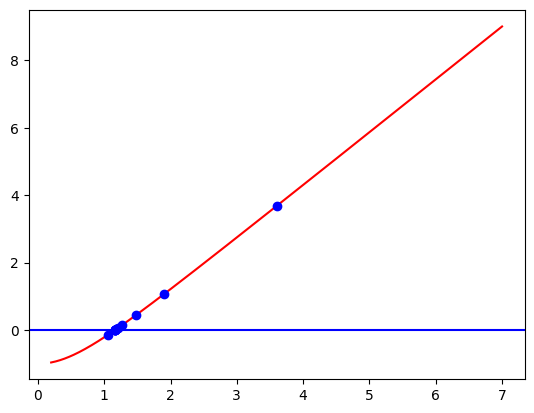

In [36]:
a = 0.2
b = 7
odch = 0.001

z = np.linspace(a, b, 400)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

(xka, fxka, x) = bisekce(f, a, b, odch)

print(x)
plt.plot(xka, fxka, 'bo')
plt.show()

### Newtonova metoda

1.1623398941794492


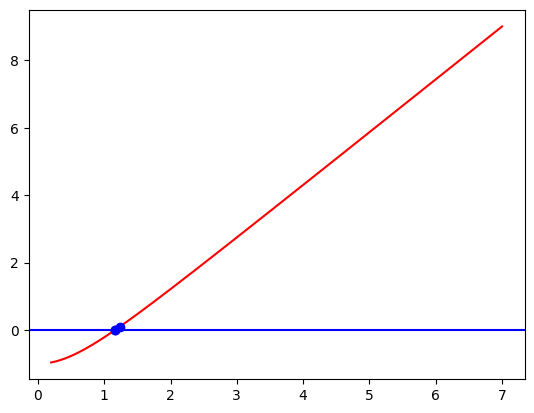

In [37]:
def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

a = 0.2
b = 7
odch = 0.001

z = np.linspace(a, b, 400)
plt.plot(z, f(z), 'r')
plt.axhline(0, color = 'b')

(xka, fxka, xnew) = newton(f, a, b, odch)

print(xnew)
plt.plot(xka, fxka, 'bo')
plt.show()

# Časová náročnost jednotlivých metod vůči přesnosti

## Polynom

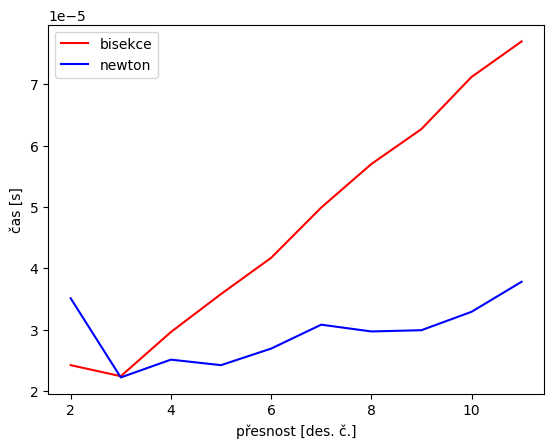

In [50]:
# seznam s přesnostmi (odchylkami) řešení - 2 až 11 des. míst
presnost = [] 
for i in range (10):
    presnost.append(0.01 / (10**i))


#def polynomu a derivace
def f(x):
    return x**5 -3*x**3 + 8*x**2 + 2*x -16

def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

# seznamy pro úkládání časů jednotlivých výpočtů
times_A = []
times_B = []

# metoda bisekce + zaznamenávání času
for odch in presnost:
    a = 0
    b = 2
    start = perf_counter()
    bisekce(f, a, b, odch)
    end = perf_counter()
    times_A.append(end - start)

# graf pro bisekci
plt.plot([i for i in range(2,12)], times_A, 'r', label = 'bisekce')

# newtonova metoda + zaznamenávání času
for odch in presnost:
    a = 0
    b = 2
    start = perf_counter()
    newton(f, a, b, odch)
    end = perf_counter()
    times_B.append(end - start)

# vykreslení grafu
plt.plot([i for i in range(2,12)], times_B, 'b', label = 'newton')
plt.xlabel('přesnost [des. č.]')
plt.ylabel('čas [s]')
plt.legend(loc = 'upper left')
plt.show()

## Exponenciela

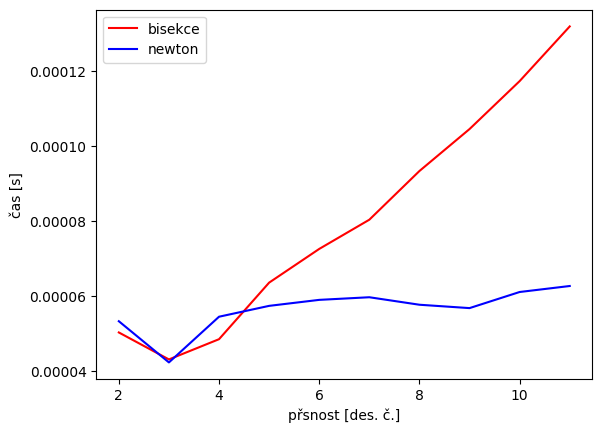

In [67]:
presnost = [] 
for i in range (10):
    presnost.append(0.01 / (10**i))


def f(x):
    return x**5 -3*x**3 + 8*x**2 + 2*x -16

def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

times_A = []
times_B = []

for odch in presnost:
    a = -3
    b = 3
    start = perf_counter()
    bisekce(f, a, b, odch)
    end = perf_counter()
    times_A.append(end - start)

plt.plot([i for i in range(2,12)], times_A, 'r', label = 'bisekce')

for odch in presnost:
    a = -3
    b = 3
    start = perf_counter()
    newton(f, a, b, odch)
    end = perf_counter()
    times_B.append(end - start)

plt.plot([i for i in range(2,12)], times_B, 'b', label = 'newton')
plt.xlabel('přsnost [des. č.]')
plt.ylabel('čas [s]')
plt.legend(loc = 'upper left')
plt.show()

## Goniometrická funkce

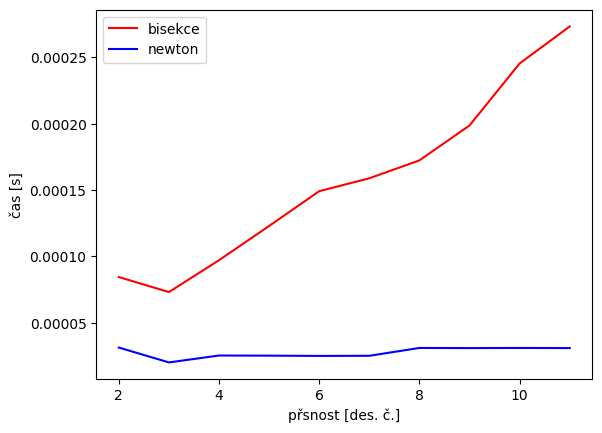

In [69]:
presnost = [] 
for i in range (10):
    presnost.append(0.01 / (10**i))


def f(x):
    return x * np.arctan(x) - 1

def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

times_A = []
times_B = []

for odch in presnost:
    a = 0.2
    b = 7
    start = perf_counter()
    bisekce(f, a, b, odch)
    end = perf_counter()
    times_A.append(end - start)

plt.plot([i for i in range(2,12)], times_A, 'r', label = 'bisekce')

for odch in presnost:
    a = 0.2
    b = 7
    start = perf_counter()
    newton(f, a, b, odch)
    end = perf_counter()
    times_B.append(end - start)

plt.plot([i for i in range(2,12)], times_B, 'b', label = 'newton')
plt.xlabel('přsnost [des. č.]')
plt.ylabel('čas [s]')
plt.legend(loc = 'upper left')
plt.show()